#### Import the libraries

In [51]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Files

In [52]:
os.chdir('C:/Users/System Administrator/Desktop/CDS/Assignment_3')

In [53]:
os.listdir()

['.ipynb_checkpoints',
 '.Rhistory',
 'dataset_Facebook.csv',
 'data_descripsion.txt',
 'Krishnakanta_Maity_CDS_Assignment_3.ipynb',
 'Krishnakanta_Maity_ML_Assignment_3.ipynb',
 'Linear_Regression.ipynb']

#### Print the names file to know the variable (attributes) of the data set

 [1] "Page.total.likes"                                                   
 [2] "Type"                                                               
 [3] "Category"                                                           
 [4] "Post.Month"                                                         
 [5] "Post.Weekday"                                                       
 [6] "Post.Hour"                                                          
 [7] "Paid"                                                               
 [8] "Lifetime.Post.Total.Reach"                                          
 [9] "Lifetime.Post.Total.Impressions"                                    
[10] "Lifetime.Engaged.Users"                                             
[11] "Lifetime.Post.Consumers"                                            
[12] "Lifetime.Post.Consumptions"                                         
[13] "Lifetime.Post.Impressions.by.people.who.have.liked.your.Page"       
[14] "Lifetime.Post.reach.by.people.who.like.your.Page"                   
[15] "Lifetime.People.who.have.liked.your.Page.and.engaged.with.your.post"
[16] "comment"                                                            
[17] "like"                                                               
[18] "share"                                                              
[19] "Total.Interactions" 

#### Read the data file

In [54]:
attributes = ['page_total_like', 'type','category','post_month','post_weekday',
                  'post_hour','paid','lpt_reach','lpt_impression','le_users','lp_consumers',
                  'lp_consumption','lp_imp_whlyp','lp_reach_whlyp','lp_whlyp_ewyp','comment','like',
                  'share','total_interection']
fb = pd.read_csv('./dataset_Facebook.csv', names = attributes, sep = ';', header = 0)
fb.head()

,page_total_like,type,category,post_month,post_weekday,post_hour,paid,lpt_reach,lpt_impression,le_users,lp_consumers,lp_consumption,lp_imp_whlyp,lp_reach_whlyp,lp_whlyp_ewyp,comment,like,share,total_interection
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


### EDA

In [55]:
fb.shape

(500, 19)

In [56]:
# Missing value
fb.isnull().sum()

page_total_like      0
type                 0
category             0
post_month           0
post_weekday         0
post_hour            0
paid                 1
lpt_reach            0
lpt_impression       0
le_users             0
lp_consumers         0
lp_consumption       0
lp_imp_whlyp         0
lp_reach_whlyp       0
lp_whlyp_ewyp        0
comment              0
like                 1
share                4
total_interection    0
dtype: int64

In [57]:
fb = fb.dropna(axis = 0)
fb.shape

(495, 19)

In [58]:
fb.describe()

,page_total_like,category,post_month,post_weekday,post_hour,paid,lpt_reach,lpt_impression,le_users,lp_consumers,lp_consumption,lp_imp_whlyp,lp_reach_whlyp,lp_whlyp_ewyp,comment,like,share,total_interection
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,123173.268687,1.886869,7.028283,4.133333,7.844444,0.280808,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,16203.818031,0.853268,3.304274,2.030735,4.385064,0.449849,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,112324.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


#### Train Test split

In [59]:
y = fb.total_interection
fb.insert(0, 'constant', np.ones(fb.shape[0]))
X = fb.drop(['page_total_like', 'type','category','post_month','post_weekday','post_hour','paid','total_interection'], axis = 1)

In [60]:
design_mat = X.iloc[:,1:X.shape[1]]
vif = pd.DataFrame()
vif['variable'] = design_mat.columns
vif['VIF'] = [variance_inflation_factor(design_mat.values, i) for i in range(design_mat.shape[1])]
vif

,variable,VIF
0,lpt_reach,26.847949
1,lpt_impression,32.659234
2,le_users,1815.720264
3,lp_consumers,1404.114913
4,lp_consumption,3.203492
5,lp_imp_whlyp,22.702150
6,lp_reach_whlyp,16.588487
7,lp_whlyp_ewyp,11.925778
8,comment,4.976297
9,like,127.389556


In [61]:
# filter the VIF values
vif.loc[vif.VIF > 15]

,variable,VIF
0,lpt_reach,26.847949
1,lpt_impression,32.659234
2,le_users,1815.720264
3,lp_consumers,1404.114913
5,lp_imp_whlyp,22.702150
6,lp_reach_whlyp,16.588487
9,like,127.389556


In [62]:
X = X.drop(['lpt_reach','lpt_impression','le_users', 'lp_consumers','lp_imp_whlyp','lp_reach_whlyp','like'], axis = 1)
X.head()

,constant,lp_consumption,lp_whlyp_ewyp,comment,share
0,1.0,159,119,4,17.0
1,1.0,1674,1108,5,29.0
2,1.0,154,132,0,14.0
3,1.0,1119,1386,58,147.0
4,1.0,580,396,19,49.0


In [63]:
for column in X.columns[1:]:
    X[column] = (X[column] - X[column].mean()) / X[column].std() 
y = (y-np.mean(y))

In [64]:
X = np.array(X)
y = np.array(y)

In [65]:
# Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}')

X_train: (396, 5)
y_train: (396,)


> ### OLS

In [66]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     763.7
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          2.97e-183
Time:                        00:13:28   Log-Likelihood:                -2514.7
No. Observations:                 396   AIC:                             5039.
Df Residuals:                     391   BIC:                             5059.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2156      7.057      0.881      0.3

In [67]:
# Analytical result
w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
print(w)

[  6.21556697 -13.23953593  36.93461963  78.38862077 277.33232533]


In [68]:
print(f'R_square value: {model.rsquared}')
print(f'Adj R_square value: {model.rsquared_adj}')
print(f'Testing accuracy: {r2_score(model.predict(X_test), y_test)}')

R_square value: 0.8865276436310986
Adj R_square value: 0.8853668011107007
Testing accuracy: 0.8360033173694499


In [69]:
class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

X_train:(396, 5)
y_train:(396,)
Iteration: 0, Cost: 84449.185
Iteration: 1, Cost: 80901.739
Iteration: 2, Cost: 77532.646
Iteration: 3, Cost: 74332.751
Iteration: 4, Cost: 71293.372
Iteration: 5, Cost: 68406.278
Iteration: 6, Cost: 65663.665
Iteration: 7, Cost: 63058.129
Iteration: 8, Cost: 60582.654
Iteration: 9, Cost: 58230.583
Iteration: 10, Cost: 55995.605
Iteration: 11, Cost: 53871.735
Iteration: 12, Cost: 51853.297
Iteration: 13, Cost: 49934.910
Iteration: 14, Cost: 48111.467
Iteration: 15, Cost: 46378.130
Iteration: 16, Cost: 44730.306
Iteration: 17, Cost: 43163.642
Iteration: 18, Cost: 41674.009
Iteration: 19, Cost: 40257.491
Iteration: 20, Cost: 38910.373
Iteration: 21, Cost: 37629.132
Iteration: 22, Cost: 36410.427
Iteration: 23, Cost: 35251.090
Iteration: 24, Cost: 34148.113
Iteration: 25, Cost: 33098.645
Iteration: 26, Cost: 32099.983
Iteration: 27, Cost: 31149.561
Iteration: 28, Cost: 30244.945
Iteration: 29, Cost: 29383.826
Iteration: 30, Cost: 28564.015
Iteration: 31, Co

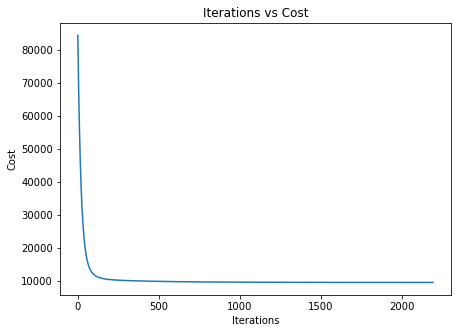

In [70]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=False)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

X_train:(396, 5)
y_train:(396,)
Iteration: 0, Cost: 84061.961
Iteration: 1, Cost: 80554.932
Iteration: 2, Cost: 77222.846
Iteration: 3, Cost: 74056.801
Iteration: 4, Cost: 71048.347
Iteration: 5, Cost: 68189.471
Iteration: 6, Cost: 65472.570
Iteration: 7, Cost: 62890.432
Iteration: 8, Cost: 60436.212
Iteration: 9, Cost: 58103.421
Iteration: 10, Cost: 55885.897
Iteration: 11, Cost: 53777.799
Iteration: 12, Cost: 51773.582
Iteration: 13, Cost: 49867.986
Iteration: 14, Cost: 48056.020
Iteration: 15, Cost: 46332.951
Iteration: 16, Cost: 44694.285
Iteration: 17, Cost: 43135.760
Iteration: 18, Cost: 41653.331
Iteration: 19, Cost: 40243.160
Iteration: 20, Cost: 38901.606
Iteration: 21, Cost: 37625.214
Iteration: 22, Cost: 36410.705
Iteration: 23, Cost: 35254.968
Iteration: 24, Cost: 34155.050
Iteration: 25, Cost: 33108.149
Iteration: 26, Cost: 32111.607
Iteration: 27, Cost: 31162.900
Iteration: 28, Cost: 30259.635
Iteration: 29, Cost: 29399.538
Iteration: 30, Cost: 28580.453
Iteration: 31, Co

Iteration: 269, Cost: 10231.139
Iteration: 270, Cost: 10228.917
Iteration: 271, Cost: 10226.711
Iteration: 272, Cost: 10224.521
Iteration: 273, Cost: 10222.348
Iteration: 274, Cost: 10220.191
Iteration: 275, Cost: 10218.049
Iteration: 276, Cost: 10215.923
Iteration: 277, Cost: 10213.811
Iteration: 278, Cost: 10211.715
Iteration: 279, Cost: 10209.633
Iteration: 280, Cost: 10207.566
Iteration: 281, Cost: 10205.513
Iteration: 282, Cost: 10203.474
Iteration: 283, Cost: 10201.449
Iteration: 284, Cost: 10199.437
Iteration: 285, Cost: 10197.438
Iteration: 286, Cost: 10195.453
Iteration: 287, Cost: 10193.481
Iteration: 288, Cost: 10191.521
Iteration: 289, Cost: 10189.574
Iteration: 290, Cost: 10187.640
Iteration: 291, Cost: 10185.717
Iteration: 292, Cost: 10183.807
Iteration: 293, Cost: 10181.908
Iteration: 294, Cost: 10180.022
Iteration: 295, Cost: 10178.146
Iteration: 296, Cost: 10176.282
Iteration: 297, Cost: 10174.429
Iteration: 298, Cost: 10172.588
Iteration: 299, Cost: 10170.757
Iteratio

Iteration: 533, Cost: 9895.869
Iteration: 534, Cost: 9895.081
Iteration: 535, Cost: 9894.296
Iteration: 536, Cost: 9893.513
Iteration: 537, Cost: 9892.732
Iteration: 538, Cost: 9891.953
Iteration: 539, Cost: 9891.177
Iteration: 540, Cost: 9890.402
Iteration: 541, Cost: 9889.630
Iteration: 542, Cost: 9888.861
Iteration: 543, Cost: 9888.093
Iteration: 544, Cost: 9887.327
Iteration: 545, Cost: 9886.564
Iteration: 546, Cost: 9885.803
Iteration: 547, Cost: 9885.044
Iteration: 548, Cost: 9884.287
Iteration: 549, Cost: 9883.532
Iteration: 550, Cost: 9882.779
Iteration: 551, Cost: 9882.029
Iteration: 552, Cost: 9881.280
Iteration: 553, Cost: 9880.534
Iteration: 554, Cost: 9879.790
Iteration: 555, Cost: 9879.048
Iteration: 556, Cost: 9878.308
Iteration: 557, Cost: 9877.570
Iteration: 558, Cost: 9876.834
Iteration: 559, Cost: 9876.100
Iteration: 560, Cost: 9875.368
Iteration: 561, Cost: 9874.639
Iteration: 562, Cost: 9873.911
Iteration: 563, Cost: 9873.185
Iteration: 564, Cost: 9872.462
Iteratio

Iteration: 819, Cost: 9740.007
Iteration: 820, Cost: 9739.647
Iteration: 821, Cost: 9739.288
Iteration: 822, Cost: 9738.930
Iteration: 823, Cost: 9738.572
Iteration: 824, Cost: 9738.216
Iteration: 825, Cost: 9737.861
Iteration: 826, Cost: 9737.507
Iteration: 827, Cost: 9737.153
Iteration: 828, Cost: 9736.801
Iteration: 829, Cost: 9736.449
Iteration: 830, Cost: 9736.099
Iteration: 831, Cost: 9735.749
Iteration: 832, Cost: 9735.400
Iteration: 833, Cost: 9735.053
Iteration: 834, Cost: 9734.706
Iteration: 835, Cost: 9734.360
Iteration: 836, Cost: 9734.015
Iteration: 837, Cost: 9733.671
Iteration: 838, Cost: 9733.328
Iteration: 839, Cost: 9732.985
Iteration: 840, Cost: 9732.644
Iteration: 841, Cost: 9732.304
Iteration: 842, Cost: 9731.964
Iteration: 843, Cost: 9731.626
Iteration: 844, Cost: 9731.288
Iteration: 845, Cost: 9730.951
Iteration: 846, Cost: 9730.615
Iteration: 847, Cost: 9730.280
Iteration: 848, Cost: 9729.946
Iteration: 849, Cost: 9729.613
Iteration: 850, Cost: 9729.281
Iteratio

Iteration: 1104, Cost: 9667.986
Iteration: 1105, Cost: 9667.817
Iteration: 1106, Cost: 9667.648
Iteration: 1107, Cost: 9667.480
Iteration: 1108, Cost: 9667.312
Iteration: 1109, Cost: 9667.145
Iteration: 1110, Cost: 9666.978
Iteration: 1111, Cost: 9666.812
Iteration: 1112, Cost: 9666.646
Iteration: 1113, Cost: 9666.480
Iteration: 1114, Cost: 9666.315
Iteration: 1115, Cost: 9666.151
Iteration: 1116, Cost: 9665.987
Iteration: 1117, Cost: 9665.823
Iteration: 1118, Cost: 9665.660
Iteration: 1119, Cost: 9665.497
Iteration: 1120, Cost: 9665.334
Iteration: 1121, Cost: 9665.172
Iteration: 1122, Cost: 9665.011
Iteration: 1123, Cost: 9664.849
Iteration: 1124, Cost: 9664.689
Iteration: 1125, Cost: 9664.528
Iteration: 1126, Cost: 9664.368
Iteration: 1127, Cost: 9664.209
Iteration: 1128, Cost: 9664.050
Iteration: 1129, Cost: 9663.891
Iteration: 1130, Cost: 9663.733
Iteration: 1131, Cost: 9663.575
Iteration: 1132, Cost: 9663.418
Iteration: 1133, Cost: 9663.261
Iteration: 1134, Cost: 9663.104
Iteratio

Iteration: 1371, Cost: 9635.535
Iteration: 1372, Cost: 9635.451
Iteration: 1373, Cost: 9635.368
Iteration: 1374, Cost: 9635.284
Iteration: 1375, Cost: 9635.201
Iteration: 1376, Cost: 9635.119
Iteration: 1377, Cost: 9635.036
Iteration: 1378, Cost: 9634.953
Iteration: 1379, Cost: 9634.871
Iteration: 1380, Cost: 9634.789
Iteration: 1381, Cost: 9634.708
Iteration: 1382, Cost: 9634.626
Iteration: 1383, Cost: 9634.545
Iteration: 1384, Cost: 9634.464
Iteration: 1385, Cost: 9634.383
Iteration: 1386, Cost: 9634.302
Iteration: 1387, Cost: 9634.221
Iteration: 1388, Cost: 9634.141
Iteration: 1389, Cost: 9634.061
Iteration: 1390, Cost: 9633.981
Iteration: 1391, Cost: 9633.902
Iteration: 1392, Cost: 9633.822
Iteration: 1393, Cost: 9633.743
Iteration: 1394, Cost: 9633.664
Iteration: 1395, Cost: 9633.585
Iteration: 1396, Cost: 9633.507
Iteration: 1397, Cost: 9633.428
Iteration: 1398, Cost: 9633.350
Iteration: 1399, Cost: 9633.272
Iteration: 1400, Cost: 9633.194
Iteration: 1401, Cost: 9633.117
Iteratio

Iteration: 1640, Cost: 9619.361
Iteration: 1641, Cost: 9619.320
Iteration: 1642, Cost: 9619.279
Iteration: 1643, Cost: 9619.237
Iteration: 1644, Cost: 9619.196
Iteration: 1645, Cost: 9619.156
Iteration: 1646, Cost: 9619.115
Iteration: 1647, Cost: 9619.074
Iteration: 1648, Cost: 9619.033
Iteration: 1649, Cost: 9618.993
Iteration: 1650, Cost: 9618.953
Iteration: 1651, Cost: 9618.912
Iteration: 1652, Cost: 9618.872
Iteration: 1653, Cost: 9618.832
Iteration: 1654, Cost: 9618.792
Iteration: 1655, Cost: 9618.752
Iteration: 1656, Cost: 9618.713
Iteration: 1657, Cost: 9618.673
Iteration: 1658, Cost: 9618.633
Iteration: 1659, Cost: 9618.594
Iteration: 1660, Cost: 9618.555
Iteration: 1661, Cost: 9618.515
Iteration: 1662, Cost: 9618.476
Iteration: 1663, Cost: 9618.437
Iteration: 1664, Cost: 9618.398
Iteration: 1665, Cost: 9618.360
Iteration: 1666, Cost: 9618.321
Iteration: 1667, Cost: 9618.282
Iteration: 1668, Cost: 9618.244
Iteration: 1669, Cost: 9618.205
Iteration: 1670, Cost: 9618.167
Iteratio

Iteration: 1903, Cost: 9611.497
Iteration: 1904, Cost: 9611.476
Iteration: 1905, Cost: 9611.456
Iteration: 1906, Cost: 9611.435
Iteration: 1907, Cost: 9611.415
Iteration: 1908, Cost: 9611.394
Iteration: 1909, Cost: 9611.374
Iteration: 1910, Cost: 9611.353
Iteration: 1911, Cost: 9611.333
Iteration: 1912, Cost: 9611.312
Iteration: 1913, Cost: 9611.292
Iteration: 1914, Cost: 9611.272
Iteration: 1915, Cost: 9611.252
Iteration: 1916, Cost: 9611.232
Iteration: 1917, Cost: 9611.212
Iteration: 1918, Cost: 9611.192
Iteration: 1919, Cost: 9611.172
Iteration: 1920, Cost: 9611.152
Iteration: 1921, Cost: 9611.132
Iteration: 1922, Cost: 9611.112
Iteration: 1923, Cost: 9611.092
Iteration: 1924, Cost: 9611.073
Iteration: 1925, Cost: 9611.053
Iteration: 1926, Cost: 9611.034
Iteration: 1927, Cost: 9611.014
Iteration: 1928, Cost: 9610.995
Iteration: 1929, Cost: 9610.975
Iteration: 1930, Cost: 9610.956
Iteration: 1931, Cost: 9610.936
Iteration: 1932, Cost: 9610.917
Iteration: 1933, Cost: 9610.898
Iteratio

Iteration: 2174, Cost: 9607.468
Iteration: 2175, Cost: 9607.458
Iteration: 2176, Cost: 9607.447
Iteration: 2177, Cost: 9607.437
Iteration: 2178, Cost: 9607.427
Iteration: 2179, Cost: 9607.417
Iteration: 2180, Cost: 9607.407
Iteration: 2181, Cost: 9607.397
Iteration: 2182, Cost: 9607.387
Iteration: 2183, Cost: 9607.377
Train Score: 0.8717131005569828
Test Score:  0.8394527001376888


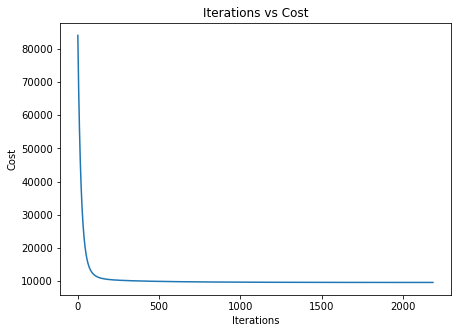

In [71]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=False)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

In [76]:
observed = y_test
predicted = seq_regressor.predict(X_test)
residual = observed - predicted

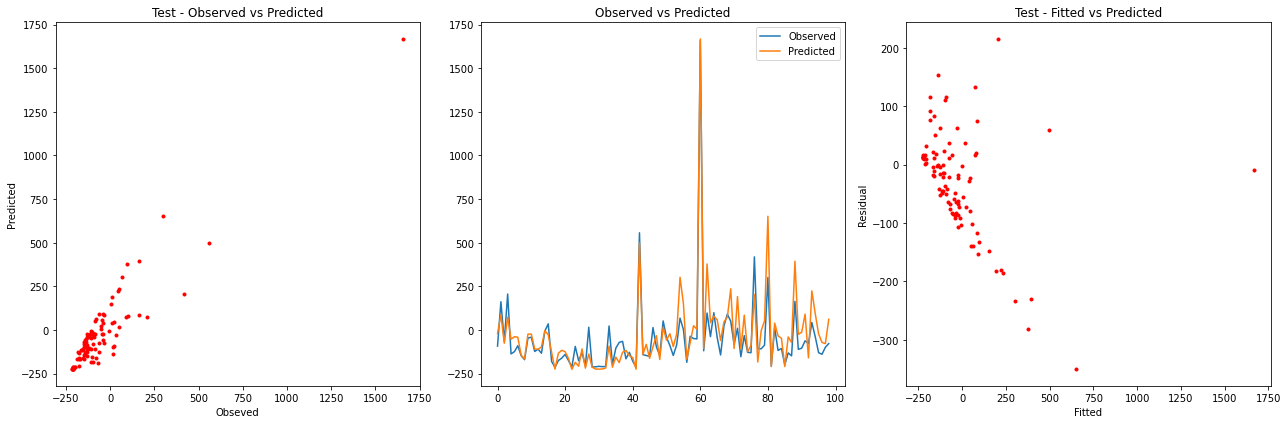

In [88]:
plt.subplots(figsize=(18, 6))
plt.subplot(1,3,1)
plt.plot(observed, predicted, 'r.')
plt.xlabel('Obseved'); plt.ylabel('Predicted')
plt.title('Test - Observed vs Predicted')
plt.subplot(1,3,2)
plt.plot(observed, label = 'Observed')
plt.plot(predicted, label = 'Predicted')
plt.title('Observed vs Predicted')
plt.legend(loc = 'best')
plt.subplot(1,3,3)
plt.plot(predicted, residual, 'r.')
plt.xlabel('Fitted'); plt.ylabel('Residual')
plt.title('Test - Fitted vs Predicted')
plt.tight_layout()